In [ ]:
!pip install opencv-python matplotlib numpy


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Environment Ready")


Environment Ready


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image using your exact path
image = cv2.imread("/content/coin.webp")

# Check if image loaded correctly
if image is None:
    print("Image did not load. Check the path.")
else:
    print("Image loaded successfully!")


Image loaded successfully!


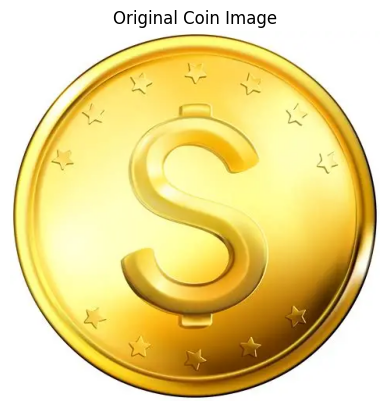

In [5]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Coin Image")
plt.axis("off")
plt.show()


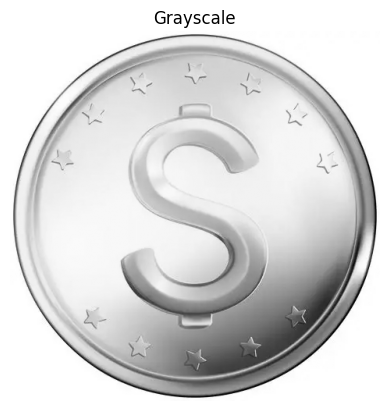

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")
plt.show()


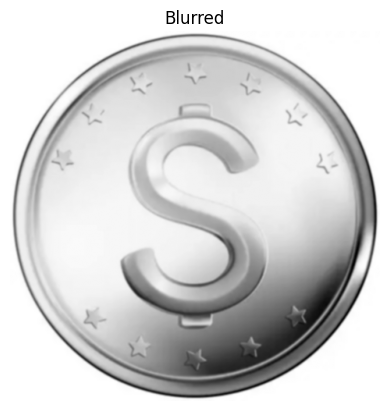

In [7]:
blur = cv2.GaussianBlur(gray, (5,5), 0)

plt.imshow(blur, cmap='gray')
plt.title("Blurred")
plt.axis("off")
plt.show()


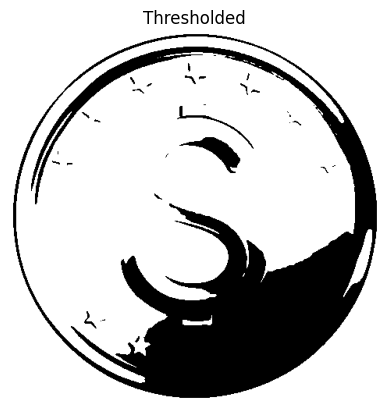

In [8]:
_, thresh = cv2.threshold(
    blur, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

plt.imshow(thresh, cmap='gray')
plt.title("Thresholded")
plt.axis("off")
plt.show()


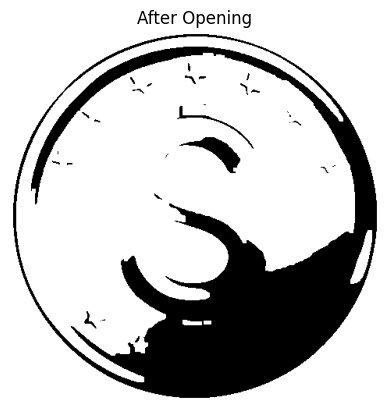

In [9]:
kernel = np.ones((3,3), np.uint8)

opening = cv2.morphologyEx(
    thresh,
    cv2.MORPH_OPEN,
    kernel,
    iterations=2
)

plt.imshow(opening, cmap='gray')
plt.title("After Opening")
plt.axis("off")
plt.show()


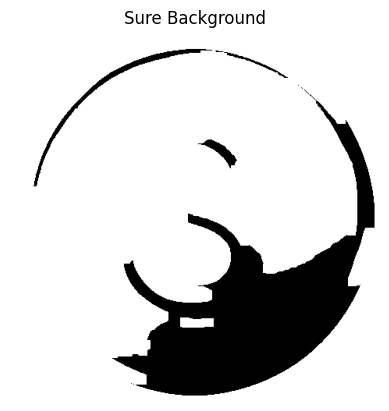

In [10]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

plt.imshow(sure_bg, cmap='gray')
plt.title("Sure Background")
plt.axis("off")
plt.show()


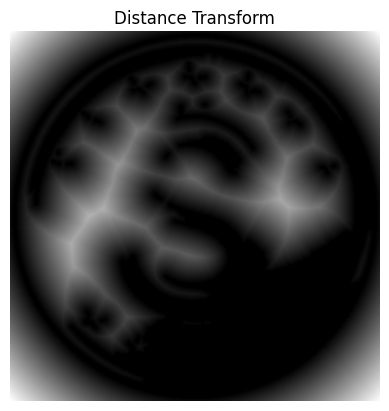

In [11]:
dist_transform = cv2.distanceTransform(
    opening,
    cv2.DIST_L2,
    5
)

plt.imshow(dist_transform, cmap='gray')
plt.title("Distance Transform")
plt.axis("off")
plt.show()


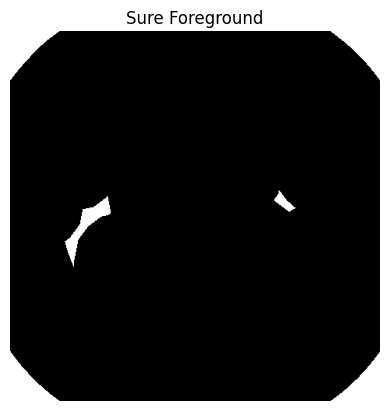

In [12]:
_, sure_fg = cv2.threshold(
    dist_transform,
    0.6 * dist_transform.max(),
    255,
    0
)

sure_fg = np.uint8(sure_fg)

plt.imshow(sure_fg, cmap='gray')
plt.title("Sure Foreground")
plt.axis("off")
plt.show()


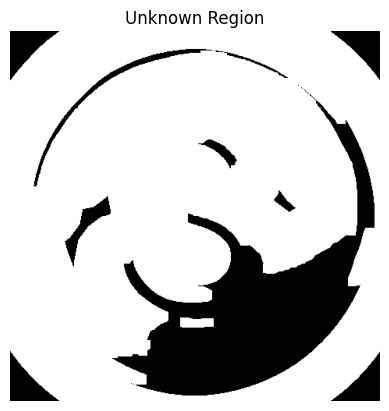

In [13]:
unknown = cv2.subtract(sure_bg, sure_fg)

plt.imshow(unknown, cmap='gray')
plt.title("Unknown Region")
plt.axis("off")
plt.show()


In [14]:
_, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown == 255] = 0


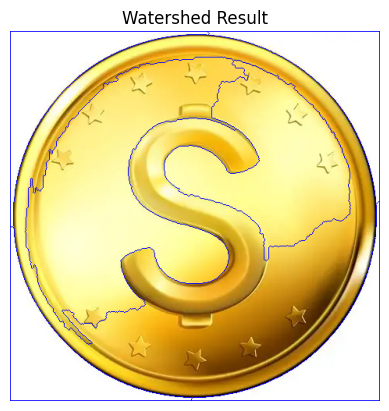

In [15]:
markers = cv2.watershed(image, markers)

# Mark boundaries in red
image[markers == -1] = [255, 0, 0]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Watershed Result")
plt.axis("off")
plt.show()


# Watershed Segmentation

Watershed segmentation is a region-based segmentation technique that treats the image as a topographic surface.

Bright pixels represent peaks.
Dark pixels represent valleys.

The algorithm floods the valleys from markers until waters meet, forming boundaries.

Advantages:
- Good for separating touching objects
- Produces clear boundaries

Disadvantages:
- Prone to over-segmentation
- Requires preprocessing


Observation:

The watershed algorithm successfully identified the boundary of the coin.
However, due to gradient lighting and highlights, some inner regions were also segmented.

Adjusting the distance transform threshold significantly affects segmentation quality.
